In [1]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [2]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:2])

['/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/0510AD3C-A266-9544-B816-CACA36F1916F.root',
 '/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/142892DA-7F19-B743-A6BF-94DC12A7D0A1.root']


In [3]:
# lets plot stuff using ROOT RDataFrame
import ROOT
if d.prefix:
    files = [("root://" + d.prefix + f) for f in d.get_files()[0:1]]
else:
    files = d.get_files()
print files
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

Welcome to JupyROOT 6.22/06
['root://dcache-cms-xrootd.desy.de:1094//store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/0510AD3C-A266-9544-B816-CACA36F1916F.root']


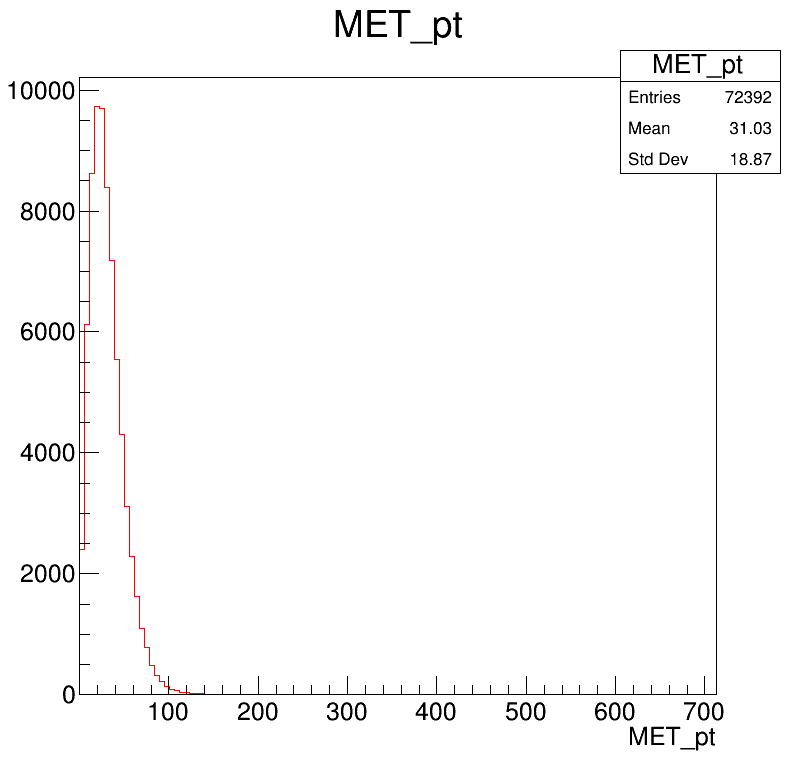

In [4]:
f = Feature("met_pt", "MET_pt")
hist = df.Histo1D(f.expression)
hist.SetLineColor(ROOT.TColor.GetColor(*d.process.color))
c = ROOT.TCanvas("", "", 800, 800)
hist.Draw()
c.Draw()